In [1]:
%pylab inline  
import GPy
import GPyOpt
from numpy.random import seed
import matplotlib

Populating the interactive namespace from numpy and matplotlib


In [2]:
def myf(x):
    return (2*x)**2

In [3]:
bounds = [{'name': 'var_1', 'type': 'continuous', 'domain': (-1,1)}]

In [4]:
max_iter = 15

In [5]:
myProblem = GPyOpt.methods.BayesianOptimization(myf,bounds)

In [6]:
myProblem.run_optimization(max_iter)

In [7]:
myProblem.x_opt

array([-0.00986067])

In [8]:
myProblem.fx_opt

0.0003889312007363193

In [9]:
%pylab inline  
import GPy
import GPyOpt

# Create the true and perturbed Forrester function and the boundaries of the problem
f_true= GPyOpt.objective_examples.experiments1d.forrester()          # noisy version
bounds = [{'name': 'var_1', 'type': 'continuous', 'domain': (0,1)}]  # problem constraints

Populating the interactive namespace from numpy and matplotlib


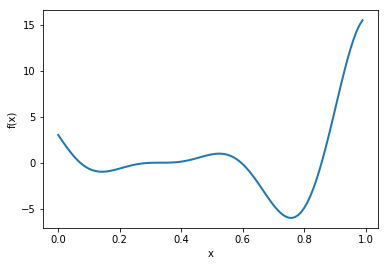

In [10]:
f_true.plot()

In [11]:
# Creates GPyOpt object with the model and anquisition fucntion
seed(123)
myBopt = GPyOpt.methods.BayesianOptimization(f=f_true.f,            # function to optimize       
                                             domain=bounds,        # box-constraints of the problem
                                             acquisition_type='EI',
                                             exact_feval = True) # Selects the Expected improvement

In [12]:
# Run the optimization
max_iter = 15     # evaluation budget
max_time = 60     # time budget 
eps      = 10e-6  # Minimum allows distance between the las two observations

myBopt.run_optimization(max_iter, max_time, eps) 

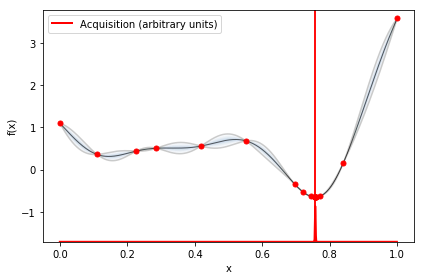

In [13]:
myBopt.plot_acquisition()

# Two Dimensional Example

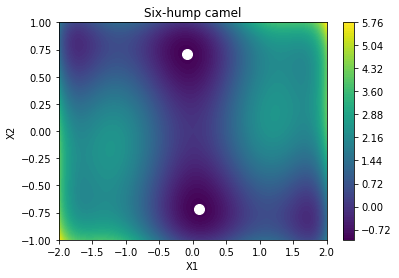

In [15]:
# create the object function
f_true = GPyOpt.objective_examples.experiments2d.sixhumpcamel()
f_sim = GPyOpt.objective_examples.experiments2d.sixhumpcamel(sd = 0.1)
bounds =[{'name': 'var_1', 'type': 'continuous', 'domain': (-3,3)},
         {'name': 'var_2', 'type': 'continuous', 'domain': (-2,2)}]
f_true.plot()

In [16]:
# Creates three identical objects that we will later use to compare the optimization strategies 
myBopt2D = GPyOpt.methods.BayesianOptimization(f_sim.f,
                                              domain=bounds,
                                              model_type = 'GP',
                                              acquisition_type='EI',  
                                              normalize_Y = True,
                                              acquisition_weight = 2)

In [17]:
# runs the optimization for the three methods
max_iter = 40  # maximum time 40 iterations
max_time = 60  # maximum time 60 seconds

myBopt2D.run_optimization(max_iter,max_time,verbosity=False)  

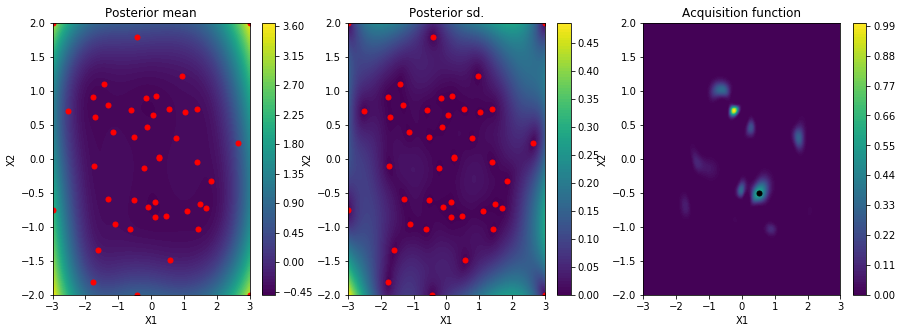

In [18]:
myBopt2D.plot_acquisition()

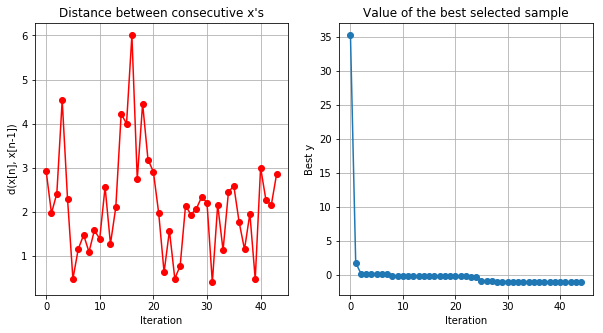

In [19]:
myBopt2D.plot_convergence()

In [20]:
myBopt2D.x_opt

array([ 0.12588011, -0.63362235])

In [21]:
myProblem.fx_opt

0.0003889312007363193

In [22]:
%pylab inline  
import GPyOpt
from numpy.random import seed
import numpy as np
seed(123)

Populating the interactive namespace from numpy and matplotlib


In [23]:
func  = GPyOpt.objective_examples.experimentsNd.alpine1(input_dim=9) 

In [24]:
mixed_domain =[{'name': 'var1', 'type': 'continuous', 'domain': (-5,5),'dimensionality': 3},
               {'name': 'var3', 'type': 'discrete', 'domain': (3,8,10),'dimensionality': 2},
               {'name': 'var4', 'type': 'categorical', 'domain': (0,1,2),'dimensionality': 1},
               {'name': 'var5', 'type': 'continuous', 'domain': (-1,2)}]

In [25]:
myBopt = GPyOpt.methods.BayesianOptimization(f=func.f,                     # Objective function       
                                             domain=mixed_domain,          # Box-constraints of the problem
                                             initial_design_numdata = 5,   # Number data initial design
                                             acquisition_type='EI',        # Expected Improvement
                                             exact_feval = True)           # True evaluations, no sample noise

In [26]:
max_iter = 20       ## maximum number of iterations
max_time = 60       ## maximum allowed time
eps      = 1e-6     ## tolerance, max distance between consicutive evaluations.

myBopt.run_optimization(max_iter,eps=0)

In [27]:
myBopt.x_opt

array([ 5.        , -5.        ,  5.        , 10.        , 10.        ,
        0.        ,  0.62998402])

In [28]:
np.round(myBopt.X,2)

array([[-3.6 ,  1.95,  2.12, 10.  , 10.  ,  2.  ,  0.07],
       [-0.99,  0.94, -0.72,  8.  , 10.  ,  1.  ,  0.25],
       [ 1.27,  1.32, -2.02, 10.  ,  8.  ,  0.  ,  0.96],
       [-1.76, -0.6 , -0.08, 10.  , 10.  ,  1.  ,  0.12],
       [-2.55, -4.16,  2.4 ,  3.  ,  8.  ,  2.  , -0.3 ],
       [-3.32,  2.66,  3.51, 10.  , 10.  ,  2.  , -0.61],
       [-2.67, -0.92,  1.35, 10.  , 10.  ,  1.  , -0.28],
       [-2.63, -2.4 , -0.74, 10.  , 10.  ,  1.  ,  0.31],
       [-5.  ,  3.84,  5.  , 10.  , 10.  ,  2.  , -0.73],
       [-5.  ,  5.  ,  5.  , 10.  , 10.  ,  1.  , -1.  ],
       [-5.  ,  5.  ,  5.  , 10.  , 10.  ,  1.  ,  1.91],
       [-5.  ,  5.  ,  5.  , 10.  ,  8.  ,  1.  , -0.16],
       [ 5.  , -5.  ,  5.  , 10.  , 10.  ,  1.  ,  2.  ],
       [ 5.  , -5.  ,  5.  , 10.  , 10.  ,  0.  , -1.  ],
       [ 5.  , -5.  ,  5.  , 10.  ,  8.  ,  1.  , -1.  ],
       [ 5.  , -5.  ,  2.92, 10.  , 10.  ,  0.  ,  1.18],
       [ 2.81, -5.  ,  5.  , 10.  , 10.  ,  0.  ,  1.16],
       [ 5.  ,

In [29]:
np.round(myBopt.X,2)

array([[-3.6 ,  1.95,  2.12, 10.  , 10.  ,  2.  ,  0.07],
       [-0.99,  0.94, -0.72,  8.  , 10.  ,  1.  ,  0.25],
       [ 1.27,  1.32, -2.02, 10.  ,  8.  ,  0.  ,  0.96],
       [-1.76, -0.6 , -0.08, 10.  , 10.  ,  1.  ,  0.12],
       [-2.55, -4.16,  2.4 ,  3.  ,  8.  ,  2.  , -0.3 ],
       [-3.32,  2.66,  3.51, 10.  , 10.  ,  2.  , -0.61],
       [-2.67, -0.92,  1.35, 10.  , 10.  ,  1.  , -0.28],
       [-2.63, -2.4 , -0.74, 10.  , 10.  ,  1.  ,  0.31],
       [-5.  ,  3.84,  5.  , 10.  , 10.  ,  2.  , -0.73],
       [-5.  ,  5.  ,  5.  , 10.  , 10.  ,  1.  , -1.  ],
       [-5.  ,  5.  ,  5.  , 10.  , 10.  ,  1.  ,  1.91],
       [-5.  ,  5.  ,  5.  , 10.  ,  8.  ,  1.  , -0.16],
       [ 5.  , -5.  ,  5.  , 10.  , 10.  ,  1.  ,  2.  ],
       [ 5.  , -5.  ,  5.  , 10.  , 10.  ,  0.  , -1.  ],
       [ 5.  , -5.  ,  5.  , 10.  ,  8.  ,  1.  , -1.  ],
       [ 5.  , -5.  ,  2.92, 10.  , 10.  ,  0.  ,  1.18],
       [ 2.81, -5.  ,  5.  , 10.  , 10.  ,  0.  ,  1.16],
       [ 5.  ,

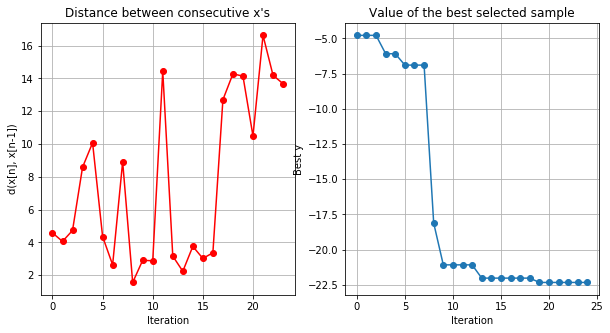

In [30]:
myBopt.plot_convergence()